In [1]:
import longi_class as lc
import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib
import longitudinal_functions as lf
import numpy as np
import pickle
import plotting_functions as pf

In [2]:
males= sorted(['4145','4146','4140', '4139', '4142', '4143'])
females = sorted(['4136','784','4096','4148','4144','4147'])

animal_order = males+females

names = af.assemble_names('/home/dprotter/Downloads/csv')
sum_files = [file for file in sorted(names) if 'summary' in file]

In [4]:
lon_ana = lc.LongitudinalAnalysis('all_exp')


In [5]:
if os.path.exists('/home/dprotter/Downloads/lon_ana.pickle'):
    print('loading data')
    lon_ana.open('/home/dprotter/Downloads/lon_ana.pickle')

[]

In [5]:
lon_ana = lc.LongitudinalAnalysis('all_exp')
files_to_load = [f for f in sum_files if not f in lon_ana.files]
for f in files_to_load:
    lon_ana.add_summary_csv(f)

In [ ]:
lon_ana.save('/home/dprotter/Downloads/lon_ana.pickle')

this path exists and will be overwritten.


In [ ]:
test = lon_ana.open('/home/dprotter/Downloads/lon_ana.pickle')

In [ ]:
with open('/home/dprotter/Downloads/lon_ana.pickle', 'rb') as f:
    temp = pickle.load(f)

In [ ]:
len(lon_ana.files)

5997

In [7]:
mets = lon_ana.metrics

In [8]:
dataset = lon_ana
met = lon_ana.metrics['total_lever_press'].data
experiment = "Autoshape"
days = None
data = met.loc[met.experiment == experiment]

anis = dataset.animal_order if dataset.animal_order else sorted(data.animal.unique() )

if days == None:
    days = sorted(data.day.unique() )

out = np.empty((len(anis), len(days)))
out[:,:] = np.nan

for i, ani in enumerate(anis):

    ani_slice = data.loc[data.animal == ani]
    
    
    for j, d in enumerate(days):
        if d in ani_slice.day.unique():
            val = ani_slice.loc[ani_slice.day == d, 'value'].values[0]
            
            out[i,j] = val
print(out)

[[nan 19. 18.]
 [nan 20. 20.]
 [nan 12.  8.]
 [nan 19. 18.]
 [ 5.  5.  8.]
 [nan 17. 20.]
 [18. 19. 19.]
 [nan 19. 19.]
 [nan 20. 20.]
 [nan  6.  7.]
 [nan 19. 20.]
 [nan 16. 15.]]


In [9]:
lon_ana.animal_order = animal_order

In [10]:
if 'Magazine' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Magazine'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,25)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pa

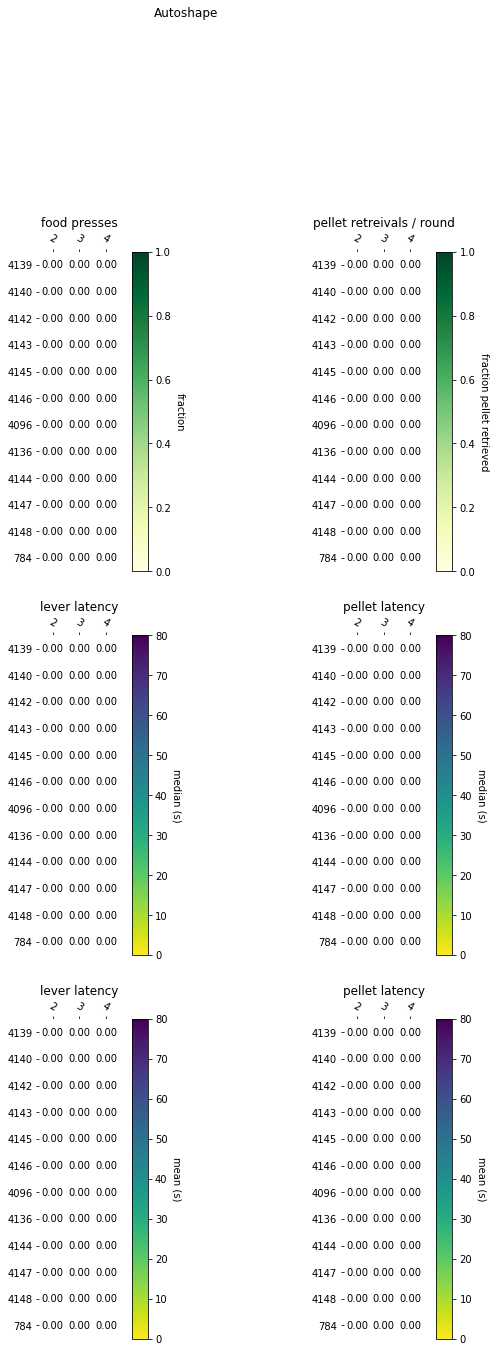

In [11]:

if 'Autoshape' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,20)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pa

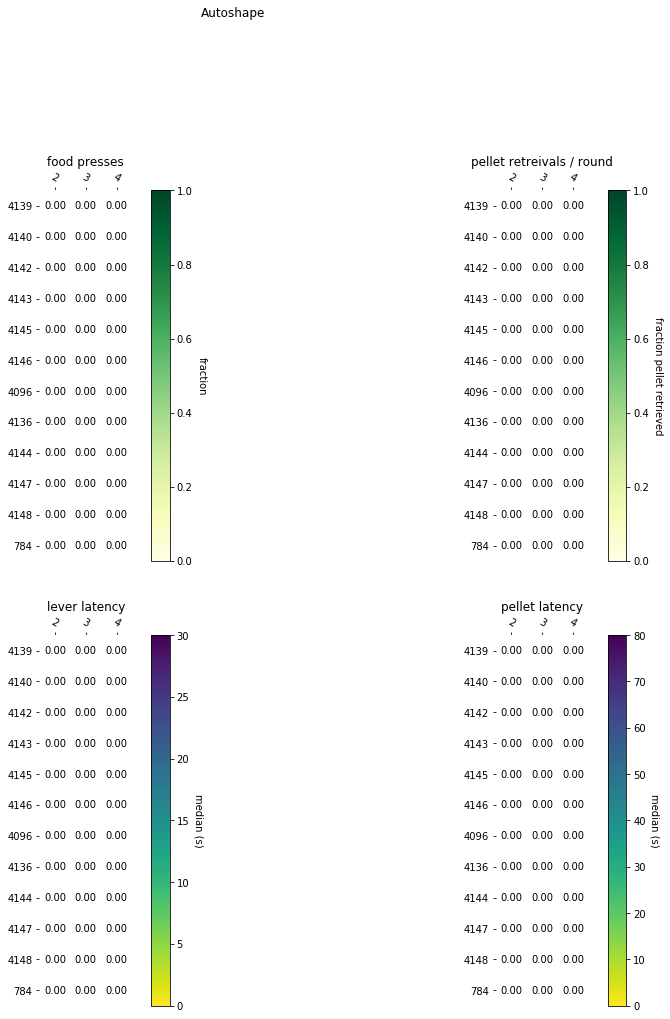

In [12]:
if 'Autoshape' in lon_ana.experiments:
    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15)) 


    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 30, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pa

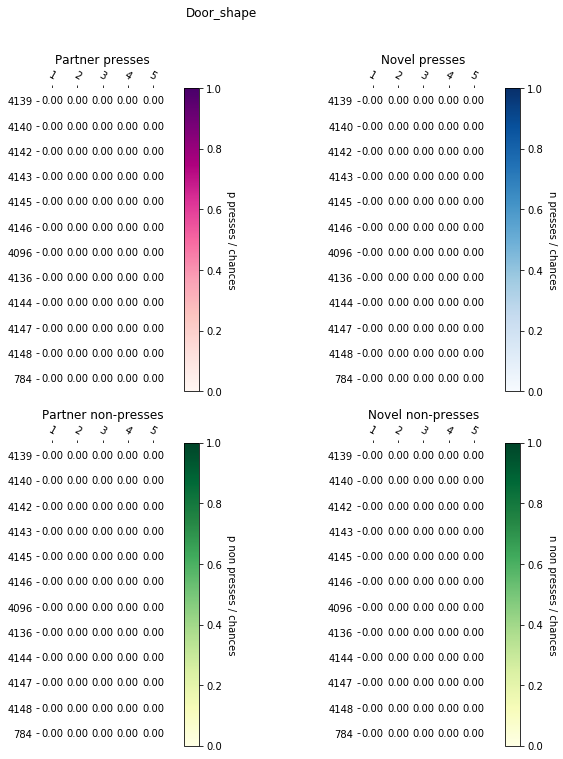

In [13]:

if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_shape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses / chances',
                        cmap = 'RdPu')

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,1],
                        title = "Novel presses", 
                        cbarlabel = 'n presses / chances',
                        cmap = 'Blues')

    metric = 'door_1_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,0],
                        title = "Partner non-presses", 
                        cbarlabel = 'p non presses / chances',
                        cmap = 'YlGn')

    metric = 'door_2_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,1],
                        title = "Novel non-presses", 
                        cbarlabel = 'n non presses / chances',
                        cmap = 'YlGn')

    fig.suptitle(experiment, y = 1.05)
    fig.tight_layout()

/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pa

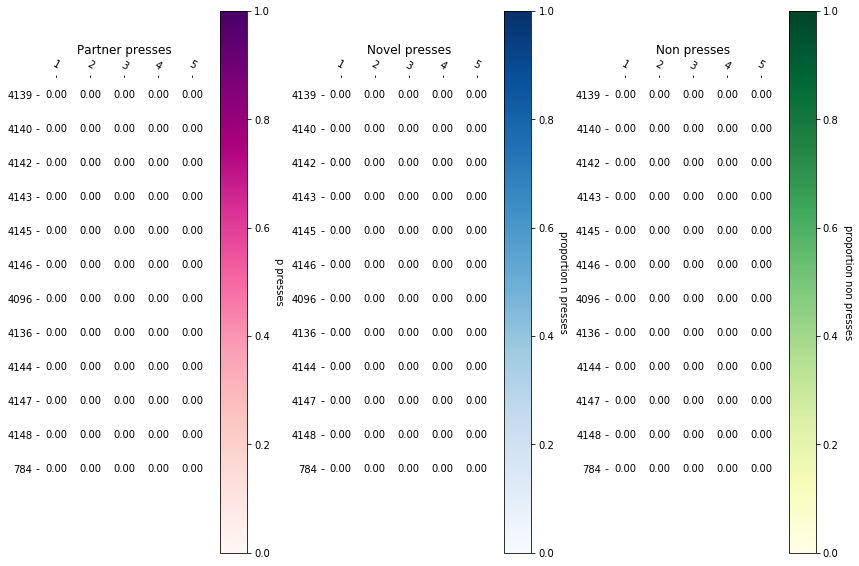

In [14]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_test'

    fig, axs = plt.subplots(ncols = 3, figsize = (12,8))

    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses',
                        cmap = 'RdPu', val_floor = 0, val_ceil = 1)

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_test'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1],
                        title = "Novel presses", 
                        cbarlabel = 'proportion n presses',
                        cmap = 'Blues')

    metric = 'prop_non_presses_by_rounds'
    experiment = 'Door_test'
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[2],
                        title = "Non presses", 
                        cbarlabel = 'proportion non presses',
                        cmap = 'YlGn')
    fig.tight_layout()

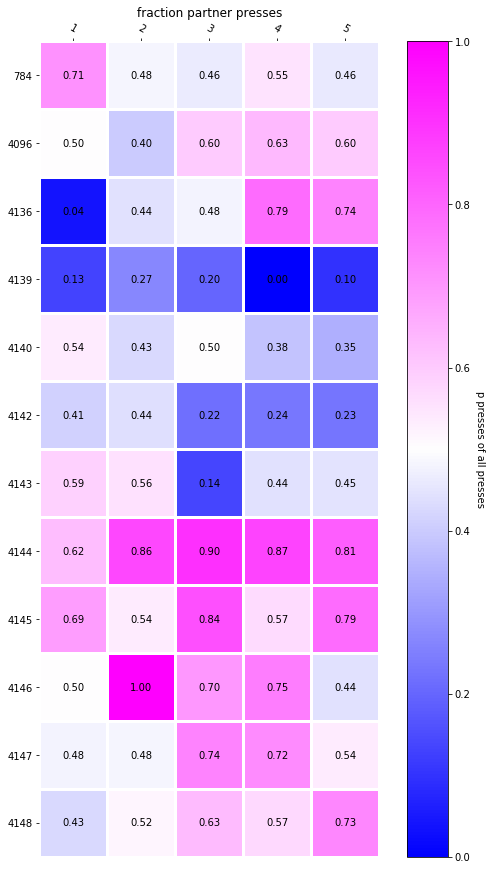

In [ ]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_test'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

In [ ]:
mets

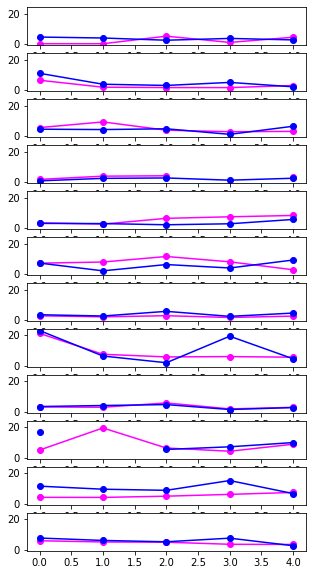

In [ ]:
metric = 'median_door_1_lever_press_latency'
experiment = 'Door_test'

ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

metric = 'median_door_2_lever_press_latency'
experiment = 'Door_test'

ani2, days2, vals2 = lf.get_data(metric, experiment = experiment, dataset = lon_ana)

fig, ax = plt.subplots(nrows = 12, sharey = True, figsize = (5, 10))
for a, data1, data2 in zip(ax.ravel(), vals, vals2):
    a.plot(data1, 'o-', color = '#ff00ff')
    a.plot(data2, 'o-', color = 'blue')

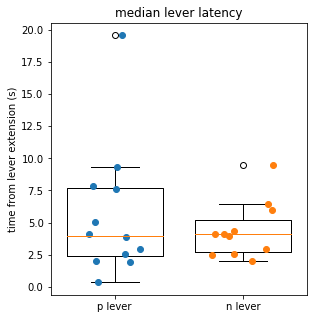

In [ ]:
import random

fig, ax = plt.subplots(figsize = (5,5))
ax.boxplot([vals[:,1], vals2[:,1][~np.isnan(vals2[:,1])]], widths = 0.75)
ax.set_xticklabels(('p lever', 'n lever'))
ax.set_title("median lever latency")
ax.set_ylabel('time from lever extension (s)')

xs = [(0.5 - random.random())/2 + 1 for _ in range(12)]
ax.plot(xs, vals[:,1], 'o')

xs = [(0.5 - random.random())/2 + 2 for _ in range(12)]
ax.plot(xs, vals2[:,1], 'o')

ax.set_aspect(0.1)

In [ ]:
if 'progressive_ratio' in lon_ana.experiments:
    metric = 'door_1_lever_press_count'
    experiment = 'progressive_ratio'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])

    fig, ax = plt.subplots(figsize = (10,15))
    
    ani, days, vals = lf.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1, threshold = 1)

Error: Kernel is dead

In [ ]:
vals2[:,1]

array([4.108839 , 3.9177165, 4.320805 , 2.441389 , 2.905457 , 2.031712 ,
       2.549129 , 6.451864 , 4.112076 ,       nan, 9.501047 , 6.00735  ])

In [ ]:
df = lon_ana.metrics['median_door_1_lever_press_latency'].data

In [ ]:
df.loc[(df.experiment == 'Door_test')&(df.day == 2)]

,animal,day,value,experiment,file
83,784,2,0.331308,Door_test,/home/dprotter/Downloads/csv/7_5_2021__9_42__D...
77,4096,2,1.962875,Door_test,/home/dprotter/Downloads/csv/7_5_2021__13_26__...
81,4136,2,9.351844,Door_test,/home/dprotter/Downloads/csv/7_5_2021__9_41__D...
84,4139,2,3.879246,Door_test,/home/dprotter/Downloads/csv/7_5_2021__9_43__D...
75,4140,2,2.562461,Door_test,/home/dprotter/Downloads/csv/7_5_2021__11_19__...
78,4142,2,7.846687,Door_test,/home/dprotter/Downloads/csv/7_5_2021__13_26__...
80,4143,2,1.996853,Door_test,/home/dprotter/Downloads/csv/7_5_2021__13_27__...
73,4144,2,7.596739,Door_test,/home/dprotter/Downloads/csv/7_5_2021__11_18__...
76,4145,2,2.969147,Door_test,/home/dprotter/Downloads/csv/7_5_2021__11_19__...
82,4146,2,19.586366,Door_test,/home/dprotter/Downloads/csv/7_5_2021__9_42__D...
